# Before/after plot

Small sample studies are common in some fields of medical research, such as physical therapy. When dealing with very small samples, it is sometimes useful to look at each subject separately, rather than only at aggregated values such as the mean. Before/after plots are useful to display effects in the individual level.

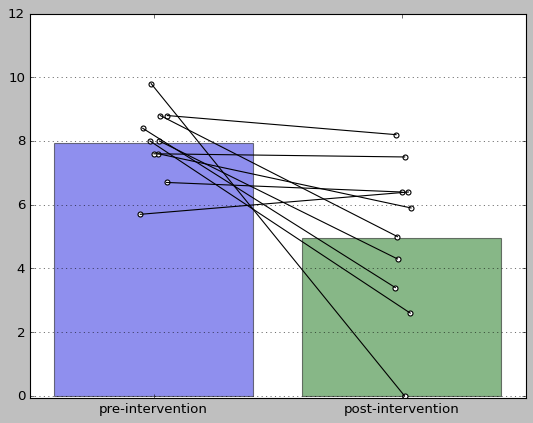

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
plt.rcParams['axes.grid'] = True


def BAplot(data, beforeLabel="Before", afterLabel='After', ax=None):
    """
    data        : Pandas Ix3 dataframe, where I is the number of samples.
                  Columns order should be ID, values before, values after
    beforeLabel : Name of data label before intervention (default: Before)
    afterLabel  : Name of data label after intervention (default: After)
    ax          : Matplotlib axes instance to plot into (default: None)
    """
    if (data.shape[1] != 3) or (type(data) != pd.DataFrame):
        print('data has to be Ix3 dataframe')
        return None

    data.columns = ['ID', beforeLabel, afterLabel]
    ax = plt.axes() if ax == None else ax

    meltData = data.melt(id_vars='ID', value_vars=[beforeLabel, afterLabel])
    sns.barplot(data=meltData,
                x="variable",
                y="value",
                alpha=0.5,
                ci=None,
                ax=ax
                )
    ax.set_xlabel('')
    ax.set_ylabel('')

    bRand = np.random.normal(loc=0, scale=0.025, size=len(data))
    aRand = np.random.normal(loc=0, scale=0.025, size=len(data))

    ax.plot([np.zeros_like(data[beforeLabel]) + bRand, np.ones_like(data[beforeLabel]) + aRand],
            [data[beforeLabel].values, data[afterLabel].values], color='black')

    ax.scatter([np.zeros_like(data[beforeLabel]) + bRand, np.ones_like(data[beforeLabel]) + aRand],
               [data[beforeLabel].values, data[afterLabel].values], edgecolor='black', color='white')

    miny = (data[[beforeLabel, afterLabel]].values.min() * 0.75) - 0.05
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(miny, ax.get_ylim()[1])
    return ax

# # example:
data = pd.read_csv('BAplot - FakeData.csv')
ax = BAplot(data, beforeLabel= "pre-intervention", afterLabel='post-intervention')
# plt.savefig('before_after_plot.jpg',dpi = 300)
plt.show()

# Bland-Altman plot

The Bland–Altman plot is a method for comparing two measurements of the same variable. The concept is that X-axis is the mean of your two measurements, and the Y-axis is the difference between the two measurements. The chart can then highlight anomalies, for example, if one method always gives too high a result, then all points are above or below the zero line. It can also reveal that one method overestimates high values and underestimates low values. If the points on the Bland–Altman plot are scattered all over the place, above and below zero, then it suggests that there is no consistent bias of one approach versus the other. It is, therefore, a good first step for two measurement techniques of a variable. 

*(Kalra, Aakshi. "Decoding the Bland–Altman plot: basic review." Journal of the Practice of Cardiovascular Sciences 3.1 (2017): 36.)*

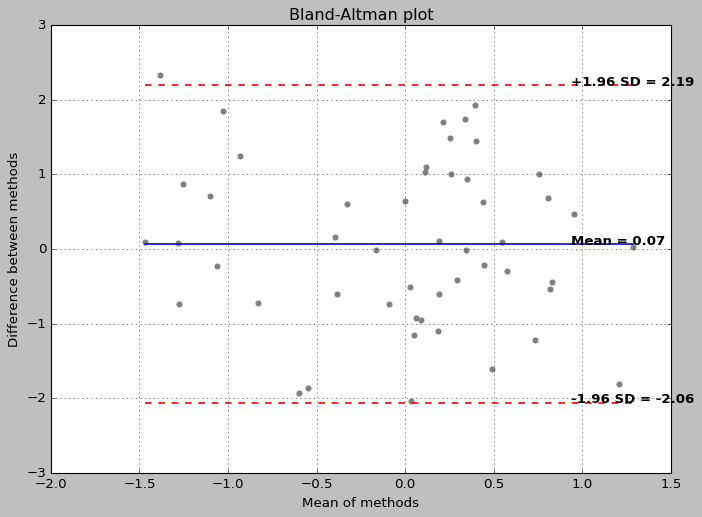

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman(data1, data2):
    if len(data1) != len(data2):
        print ("Datasets size mismatch")
        return

    mn = (data1 + data2) / 2
    diff = data1 - data2

    plt.figure(figsize=(10, 7))
    plt.scatter(mn, diff, color='gray')
    plt.plot([mn.min(), mn.max()], [diff.mean(), diff.mean()], lw='1.5')

    s = "Mean = " + str(round(diff.mean(), 2))
    plt.text(mn.max() - 1 / 2 * mn.std(), diff.mean(), s, fontweight='bold')

    plt.plot([mn.min(), mn.max()], [diff.mean() + 1.96 * diff.std(),
                                    diff.mean() + 1.96 * diff.std()], ls='--', lw='1.5', color='red')

    s = "+1.96 SD = " + str(round(diff.mean() + 1.96 * diff.std(), 2))
    plt.text(mn.max() - 1 / 2 * mn.std(), diff.mean() + 1.96 * diff.std(), s, fontweight='bold')

    plt.plot([mn.min(), mn.max()], [diff.mean() - 1.96 * diff.std(),
                                    diff.mean() - 1.96 * diff.std()], ls='--', lw='1.5', color='red')
    s = "-1.96 SD = " + str(round(diff.mean() - 1.96 * diff.std(), 2))
    plt.text(mn.max() - 1 / 2 * mn.std(), diff.mean() - 1.96 * diff.std(), s, fontweight='bold')

    plt.ylabel('Difference between methods')
    plt.xlabel('Mean of methods')
    plt.title('Bland-Altman plot')
    plt.show()

# example:
bland_altman(np.random.normal(size=50), np.random.normal(size=50))

# DescTable

A tool to create a summary table (mean (SD)) for continuous variables from a Pandas DataFrame, grouped by a categorical variable.

In [7]:
import pandas as pd
from IPython.display import display

def descTable(data, group = None, r = 1):
    """
    :param data: Pandas DataFrame
    :param group: Grouping variable
    :param r: number of decimals for rounding
    :return: strings data frame of mean (SD) of all columns, grouped by `group`
    """
    if group:
        l = list(data.columns)

        m = data.groupby(group)[l].mean().T.round(r).astype(str)
        s = data.groupby(group)[l].std().T.round(r).astype(str)

        t = (m + ' (' + s + ')')
        return t
    else:
        m = data.mean().T.round(r).astype(str)
        s = data.std().T.round(r).astype(str)

        t = (m + ' (' + s + ')')
        return t

# example:
data = pd.DataFrame({'gender': ['m', 'm', 'm', 'f', 'm', 'f', 'f', 'f'],
                     'height': [1.76, 1.83, 1.6, 1.65, 1.88, 1.72, 1.59, 1.61],
                     'weight': [83, 70, 59, 59, 70, 90, 72, 42]
                     })
display(data)

display(descTable(data = data,
                  group = 'gender',
                  r = 1))

,gender,height,weight
0,m,1.76,83
1,m,1.83,70
2,m,1.60,59
3,f,1.65,59
4,m,1.88,70
5,f,1.72,90
6,f,1.59,72
7,f,1.61,42


gender,f,m
height,1.6 (0.1),1.8 (0.1)
weight,65.8 (20.3),70.5 (9.8)
